In [144]:
import pandas as pd
from pandas import read_csv 
from pandas import datetime 
from matplotlib import pyplot 
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error




In [145]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [146]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

In [147]:
from pandas import DataFrame
df= DataFrame(series)

In [148]:
df.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


<AxesSubplot:xlabel='Month'>

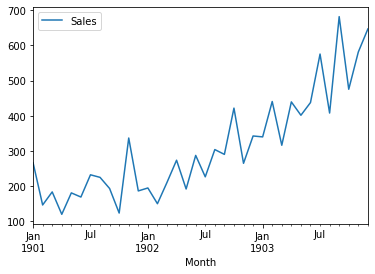

In [149]:
df.plot()

In [150]:
from statsmodels.tsa.stattools import adfuller


In [151]:
test_result=adfuller(df['Sales'])


In [152]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [153]:
adfuller_test(df['Sales'])


ADF Test Statistic : 3.060142083641181
p-value : 1.0
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [154]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)


In [155]:
df['Sales'].shift(1)


Month
1901-01-01      NaN
1901-02-01    266.0
1901-03-01    145.9
1901-04-01    183.1
1901-05-01    119.3
1901-06-01    180.3
1901-07-01    168.5
1901-08-01    231.8
1901-09-01    224.5
1901-10-01    192.8
1901-11-01    122.9
1901-12-01    336.5
1902-01-01    185.9
1902-02-01    194.3
1902-03-01    149.5
1902-04-01    210.1
1902-05-01    273.3
1902-06-01    191.4
1902-07-01    287.0
1902-08-01    226.0
1902-09-01    303.6
1902-10-01    289.9
1902-11-01    421.6
1902-12-01    264.5
1903-01-01    342.3
1903-02-01    339.7
1903-03-01    440.4
1903-04-01    315.9
1903-05-01    439.3
1903-06-01    401.3
1903-07-01    437.4
1903-08-01    575.5
1903-09-01    407.6
1903-10-01    682.0
1903-11-01    475.3
1903-12-01    581.3
Name: Sales, dtype: float64

In [156]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(1)


In [157]:
df['Seasonal First Difference']

Month
1901-01-01      NaN
1901-02-01   -120.1
1901-03-01     37.2
1901-04-01    -63.8
1901-05-01     61.0
1901-06-01    -11.8
1901-07-01     63.3
1901-08-01     -7.3
1901-09-01    -31.7
1901-10-01    -69.9
1901-11-01    213.6
1901-12-01   -150.6
1902-01-01      8.4
1902-02-01    -44.8
1902-03-01     60.6
1902-04-01     63.2
1902-05-01    -81.9
1902-06-01     95.6
1902-07-01    -61.0
1902-08-01     77.6
1902-09-01    -13.7
1902-10-01    131.7
1902-11-01   -157.1
1902-12-01     77.8
1903-01-01     -2.6
1903-02-01    100.7
1903-03-01   -124.5
1903-04-01    123.4
1903-05-01    -38.0
1903-06-01     36.1
1903-07-01    138.1
1903-08-01   -167.9
1903-09-01    274.4
1903-10-01   -206.7
1903-11-01    106.0
1903-12-01     65.6
Name: Seasonal First Difference, dtype: float64

<AxesSubplot:xlabel='Month'>

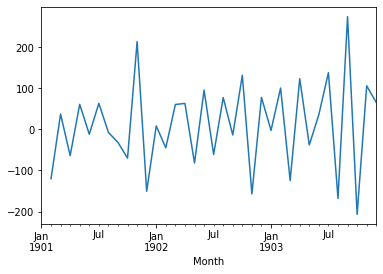

In [158]:
df['Seasonal First Difference'].plot()

In [159]:
adfuller_test(df['Seasonal First Difference'].dropna())


ADF Test Statistic : -7.249074055553854
p-value : 1.7998574141687034e-10
#Lags Used : 1
Number of Observations Used : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

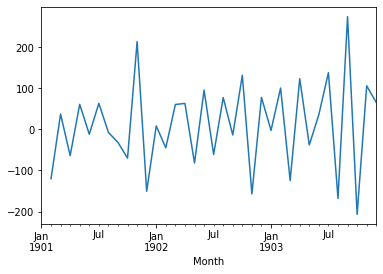

In [160]:
df['Seasonal First Difference'].plot()


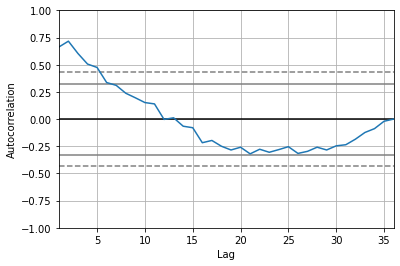

In [163]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
autocorrelation_plot(df['Sales'])
plt.show()


In [164]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


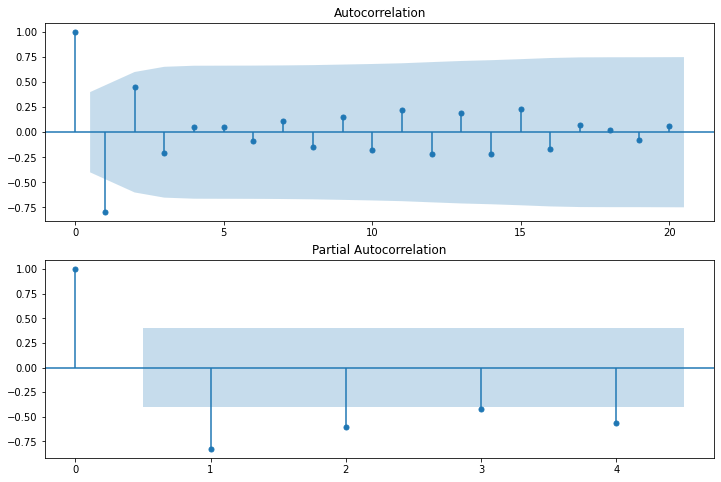

In [176]:

import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[12:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[12:],lags=4,ax=ax2)


In [177]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [178]:
model=ARIMA(df['Sales'],order=(1,1,0))
model_fit=model.fit()


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequen

In [179]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -200.011
Method:                       css-mle   S.D. of innovations             72.566
Date:                Sun, 27 Dec 2020   AIC                            406.022
Time:                        19:10:48   BIC                            410.688
Sample:                    02-01-1901   HQIC                           407.633
                         - 12-01-1903                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.8299      7.152      1.654      0.098      -2.187      25.847
ar.L1.D.Sales    -0.7364      0.111     -6.605      0.000      -0.955      -0.518
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3579           +0.0000j            1.3579            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

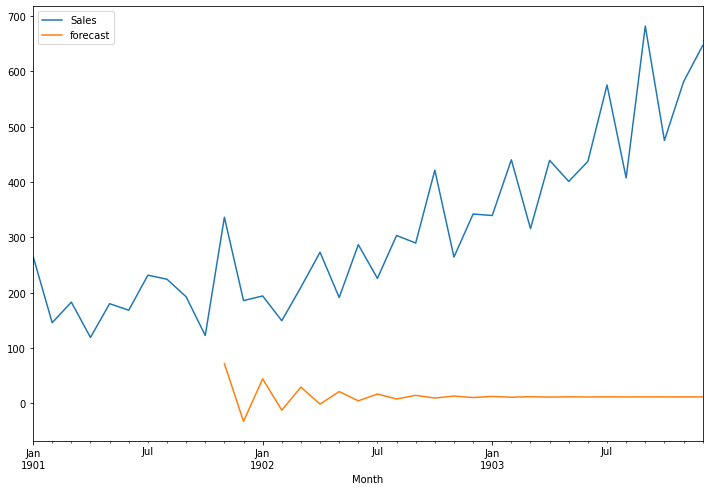

In [185]:
df['forecast']=model_fit.predict(start=10,end=40,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [196]:
from sklearn.metrics import mean_squared_error

In [215]:
model_fit.aic

344.4512389285863

In [220]:
pred= model_fit.forecast(steps=9)[0]

In [221]:
np.sqrt(mean_squared_error(test_data,pred))

155.4043342505582